## FILL IN YOUR NAME AND UTORID HERE

Python Assignment 2: Orbital motion 
==========================================================

## Before you begin

Assuming you have loaded this file into your Jupyter Notebooks workspace, make sure to press the "play" button at the top of the page in each box. This will render the Markdown into nicely-formatted text and execute all of the sections of Python code. Note that some sections will give error messages until you add the calculations you are asked for. 

## Introduction

In class we have been discussing gravitation and the orbits of planets around the Sun. In this python notebook you will show how a planet's orbital speed changes over the course of its orbit, for circular orbits and for elliptical orbits. 

For this assignment, it will be useful to remind yourself of C&O sections 2.2 and 2.3. 

As you modify each of the following segments of code, remember to hit the "play" button at the top of the notebooks interface so that the cell containing the code "runs" (you can also hit Shift+Return for the same functionality). It should display the output of the piece of code just below that cell. You can run every cell in this notebook before you modify it, just to see what it produces. If you find any of this confusing or overwhelming, please refer back to the programming resources in the "Guides" section on Quercus. The "Introduction to Programming" guide contains links to some documents that should help you.

In [1]:
# Here we will import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Here we are adding a couple new libraries. These are extremely useful for keeping track of 
# units and constants! 
# Remember that when we import a library as 'x', we can then call all that library's functions by x.function()
from astropy import units as u
from astropy import constants as c

## Using the astropy libraries to track constants and units ##
Below is some simple code showing you how to use the astropy.units and astropy.constants libraries to better keep track of your calculations. In both coding and problem sets, if you get a result that seems off, check your units! 

For more information on astropy units, check out the [documentation](https://docs.astropy.org/en/stable/units/). 

In [2]:
# Play around with this to see how units work!
# Simple calculation - constant motion in a straight line

# Set a speed:
v = 25. *u.km/u.hour
# Set a time:
t = 37 * u.s
# Calculate distance traveled:
d = v * t
d

<Quantity 925. km s / h>

In [3]:
# Well that's not so useful! You can see that we have two units of time in the result. 
# Try this:
d.to(u.km)

<Quantity 0.25694444 km>

In [4]:
# You can also simply output the value of the result, but be sure to specify your desired unit or your answer
# may be nonsensical
print('My value for d without specifying units is {0}'.format(d.value))
print('My value for d in units of km is {0}'.format(d.to(u.km).value))
print('My value for d in units of au is {0}'.format(d.to(u.au).value))

# Also this is way too many sig figs. Below I will include an example of formatted output.  

My value for d without specifying units is 925.0
My value for d in units of km is 0.2569444444444444
My value for d in units of au is 1.7175675244717535e-09


## Setting up the problem ##

There are a number of parameters that are needed to fully describe the motion of a planet around a star, or of two stars orbiting a common centre of mass. Avoiding the effects of orbital inclination and tilt, they are:
- the semi-major axis $a$
- the eccentricity $e$
- the masses of the objects $m_1$ and $m_2$, or the mass of the star $M$ if $M >> m$
- the period of the orbit $P$

From these, we can calculate the distance $r$ of the planet from the star, and the orbital velocity $v$. 

Use the next block to set up your orbital parameters. To start, we will look at the orbit of an Earth-like planet in an Earth-like orbit around a star with the same mass as the Sun. 

In [5]:
## Question 1: Modify the code below to set up the problem as described above. Use the parameters for Earth's orbit. 
p = (365.26)*u.day   # Use astropy units library to keep things nice
a = 1.0*u.au     # 
e = 0.0167       # remember e has no units
M = 1.0*u.Msun   # Mass of the star
m = 1.0*u.Mearth # Mass of the planet

## Calculating r and v

When we assume that the orbit is circular, the distance from the planet to the star, and its orbital speed, remain constant. Here, we want to plot how the distance from the planet to the star, and the orbital speed, change over the course of the planet's orbit in the elliptical case. 

You will want to recall two equations:

$r = \frac{a(1-e^2)}{1 + e\mathrm{cos}\theta}$  

$v = \sqrt{GM (2/r - 1/a)}$

You can see from C&O 2.3 that this solution for $v$ is for the motion of the centre of mass of a two body system, and the above relationship holds when $M >> m$. 

Refer to Figure 2.4 in C&O to remind yourself that $\theta$ is the angle that describes the planet's position in its orbit, measured counterclockwise from the major axis of the ellipse. To plot $r$ and $v$, we need $\theta$.  

In [6]:
## QUESTION 2: Create an array for theta in radians that will allow us to plot r and v over 
# *the entire orbit*. 
# We are using the np.linspace function, where:
# array = np.linspace(start_value, stop_value, number of steps)
# This will create an array of values between your start and stop value, evenly spaced with an interval between 
# values that depends on the number of steps you choose. 
# Replace these values the start and stop values you would need to plot a full orbit. 
# The number of steps to use is up to you; if your plots below are choppy you may want to go back and increase the number. 

theta_rad = np.linspace(0, 6.283185, 30)*u.rad

# Print out the first few numbers:
theta_rad[0:5]

<Quantity [0.        , 0.21666155, 0.4333231 , 0.64998466, 0.86664621] rad>

In [7]:
## QUESTION 3: Write out code that will calculate r and v following the above equations, using your theta_rad array. 
# Remember that you can do calculations with arrays the same way you can do calculations with single numbers!
# Use the variables a, e, M, etc. from above in your calculation, as we did in the simple
# distance calculation above. 
# You divide with the '/' symbol, multiply with '*'. Use brackets to ensure the math is done in the correct order!
# In python, power laws are calculated via x**2. 
# You can use np.cos(x) for cosine (assuming x is in radians), and np.sqrt(x) for square roots. 
# You can also do roots via power laws, like (x)**(1/2.), as an example. 

r = (a*(1-e**2))/(1+e*(np.cos(theta_rad)))

v = np.sqrt(((c.G)*M)*(2/r-1/a))

# Print out the first r and v value:
# Note how we can adjust the decimal places being reported! 
# If you have used units, they will be included in your output. 
# If you haven't, this will produce an error! 
print('At r = {0:.4}, the velocity of the planet is {1:.4}'.format(r.to(u.au)[0], v.to(u.km/u.s)[0]))

At r = 0.9833 AU, the velocity of the planet is 30.29 km / s


In [8]:
# SCRATCH BOX
# The box above will throw errors if your units aren't correct for r and v. 
# If you're having trouble making your units work, use this box as a scratch area
# to test your calculations. You can always make a scratch box on your own in these 
# templates, just label it like this one, or delete it when you've solved your problem.



## Plotting the results

Text(0, 0.5, 'Velocity(km/s)')

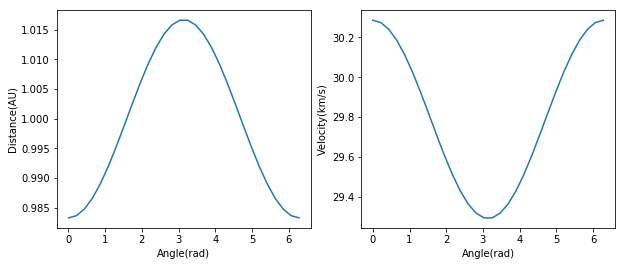

In [9]:
## QUESTION 4: Edit the code below to create a two-panel plot that shows r and v as a function of theta
# Things to include:
# - axis labels
# - reasonable units for r and v, I suggest au and km/s
# Check that your plot is reasonable! Are you getting values you expect for r and v?

# This code creates two plots side-by-side, horizontally. You can do two vertical subplots using plt.subplots(2,1). 
# Then 'ax1.plot' is used instead of 'plt.plot' for the plot on the left, and ax2 is used for the plot on the right. 
# Figsize can be adjusted to make your plots bigger and space them out better. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(theta_rad, r)       # plot theta vs. r here in some units
ax2.plot(theta_rad, v.to(u.km/u.s))   # plot theta vs. v here in some units
# Fill in between the '' to create labels below; see your previous python assignment
ax1.set_xlabel('Angle(rad)')
ax2.set_xlabel('Angle(rad)')
ax1.set_ylabel('Distance(AU)')
ax2.set_ylabel('Velocity(km/s)')

Caption your plot here: Distance vs Angle and Velocity vs Angle of the orbit of an Earth-like planet orbiting around a star

In [10]:
# QUESTION 5:
# Next calculate the kinetic and potential energy of the system,
# and the total energy. 
# We will plot these on the same plot to see how they vary. 
# You can do this using the equations you know for the kinetic and potential energy, 
# and by using the arrays for r and v that you calculated above you should then have
# arrays for Ekin and Epot as a function of theta.

ekin = .5*m*(v**2)
epot = -(((c.G)*M*m)/r)

# Add together your ekin and epot arrays to calculate the total energy. Make sure they have
# the same units! To test, you can add print statements to see what units you have in your 
# calculations, i.e.
# Uncomment and edit this line:
print('The first value of ekin is {0}'.format(ekin[0].cgs))
print('The first value of epot is {0}'.format(epot[0].cgs))

e_tot = ekin + epot

# Lastly, calculate what Etot would be from the virial equation:
e_tot_virial = epot/2

# Check to see if your results agree! 
print('From the virial equation, E_tot = {0:.3}'.format(e_tot_virial.cgs[0]))
print('From the sum of the kinetic and potential energies, E_tot = {0:.3}'.format(e_tot.cgs[0]))

The first value of ekin is 2.7391091128756046e+40 erg
The first value of epot is -5.388234706158365e+40 erg
From the virial equation, E_tot = -2.69e+40 erg
From the sum of the kinetic and potential energies, E_tot = -2.65e+40 erg


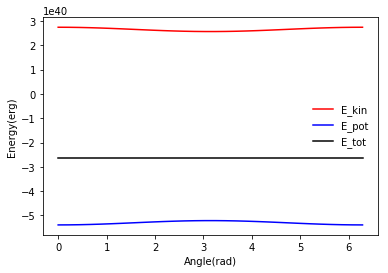

In [11]:
# QUESTION 6: Plot your results! 
fig = plt.figure()
# In the next three lines, change 'ekin' to ekin.to(some unit), etc. to make readable plots 
plt.plot(theta_rad,ekin.to(u.erg),color='red',label='E_kin') 
plt.plot(theta_rad,epot.to(u.erg),color='blue',label='E_pot') 
plt.plot(theta_rad,e_tot.to(u.erg),color='black',label='E_tot')
plt.xlabel('Angle(rad)') # Add label
plt.ylabel('Energy(erg)') # Add label
plt.legend(frameon=False)


## Using functions to explore how r and v vary with orbital parameters

In python, once you start writing longer and more complicated programs, it is useful to create your own functions that you can then call in your code. Functions can be used for calculations that you might do many times, or to simplify a very long block of code. Remember you always have to run the function definition before you can run it in the code. This can be done by including your functions near the beginning of your notebook. Here, we will just define the function in the same block as running it. 

You create a function with a line starting 'def' , followed by your function name, brackets containing the parameters you need to give that function for it to do its work, followed by a colon. This tells python that everything underneath and indented (the indent is important!) that those lines are part of the function. 

We will just create a simple function here that returns two arrays, $r$ and $v$, but if you want to learn more one good tutorial is [here](http://introtopython.org/introducing_functions.html). 

In [12]:
# QUESTION 7: First create your function by copying and pasting your equations for r and v
# below the 'def' statement in the space provided. Make sure you keep the indents! 

def calc_r_and_v(theta_rad, a, e, M):
    r = (a*(1-e**2))/(1+e*(np.cos(theta_rad)))
    v = (np.sqrt(((c.G)*M)*(2/r-1/a)))
    return r, v

# We have told the function to return r and v arrays, given the inputs
# The rest of the code is NOT indented because it is not part of the function! 
# You need to ensure that theta_rad is an array! There are tests you can do to ensure the 
# variable type is correct in a function like this, but we will leave that for another day.

# Once you've defined the function, you can use it. Because our function returns TWO arrays,
# we need to call it with two variables for them to go into:

r_array, v_array = calc_r_and_v(theta_rad, a, e, M)

# Print out a few numbers to check that you have arrays as outputs
# and so you can see if your values match what you had earlier! 
print(r_array[0:5].to(u.au))
v_array[0:5].to(u.km/u.s)

[0.9833     0.98367776 0.98479505 0.98660445 0.98902838] AU


<Quantity [30.28631975, 30.27487798, 30.24106238, 30.18638273, 30.11329077] km / s>

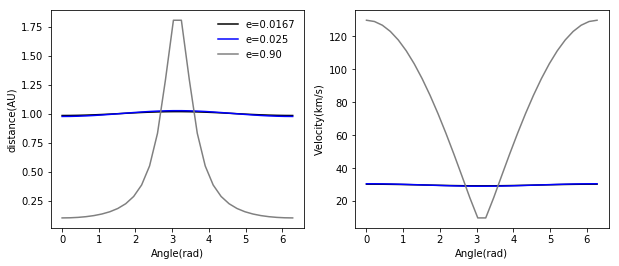

In [28]:
# QUESTION 8: Calculate new r and v arrays for different eccentricity values, and plot together.

# Now that we've defined a function, we can more quickly look at what happens when we change
# some of the orbital parameters. 

# Use your function to plot r and v as a function of theta_rad as in Question 4, but add as
# separate colours the values you get when changing e to a slightly larger value than you 
# used above for the Earth's orbit, and to a value close to, but less than 1. 
# Be sure to include a legend that states what e values you chose, and label your axes. 

# First, run your function to create two more arrays for r and v. We will keep all other
# orbital parameters the same, but change e:
e1 = 0.025
r_e1, v_e1 = calc_r_and_v(theta_rad, a, e1, M)

e2 = 0.9
r_e2, v_e2 = calc_r_and_v(theta_rad, a, e2, M)

# Create a plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Plot the original results for Earth:
# In these and following lines, be sure to change 'r' to r.to(some unit) and 'v' to v.to(some unit)
# in order to make readable plots 

ax1.plot(theta_rad, r.to(u.au),color='black',label='e=0.0167')       # plot theta vs. r here in some units
ax2.plot(theta_rad, v.to(u.km/u.s),color='black',label='e=0.0167')   # plot theta vs. v here in some units


# Plot the results for your first eccentricity value:
ax1.plot(theta_rad, r_e1.to(u.au),color='blue',label='e=0.025')       # plot theta vs. r here in some units
ax2.plot(theta_rad, v_e1.to(u.km/u.s),color='blue',label='e=0.025')   # plot theta vs. v here in some units

# Plot the results for your second eccentricity value:
ax1.plot(theta_rad, r_e2.to(u.au),color='gray',label='e=0.90')       # plot theta vs. r here in some units
ax2.plot(theta_rad, v_e2.to(u.km/u.s),color='gray',label='0.90')   # plot theta vs. v here in some units

# Add appropriate labels below
ax1.set_xlabel('Angle(rad)')
ax2.set_xlabel('Angle(rad)')
ax1.set_ylabel('distance(AU)') # include the units for r
ax2.set_ylabel('Velocity(km/s)') # include the units for v
ax1.legend(frameon=False)

## Discussion

Hopefully you can see that for the same semi-major axis value, and the same mass of the star and planet, changing the eccentricity of the orbit greatly changes values of $r$ at perihelion and aphelion. You should also see that when the planet is furthest from the sun, its speed in the orbit is slowest. If you don't see these things in your plot above, please re-check your calculations! 

### Question  9

Do you expect the total energy in these systems has changed? Why or why not? Add your answer in the markdown text below (you could also use a scratch box  to calculate this!):

### Question 9 Answer:
I did not expect the total energy in these systems to change because there are no external forces acting on the system. The only force acting on these systems is gravity and therefore, energy must be conserved. If the planet slows down, it will lose kinetic energy, however, that "lost" energy will be converted to gravitational potential energy.

It is important to note, however, that the assumption made above is almost purely theoretical and requires a perfect system. In the "real world," energy is not always conserved perfectly, but since this particular system is in near empty space, it can be assumed that a very miniscule amount of energy has been lost over time and therefore the change is negligible.

In [29]:
# Extra box for stuff if you need it! 